<h1 class="alert alert-info"><center>Activité : recherche textuelle</center></h1>

Le but de cette activité est de présenter quelques algorithmes simples permettant de détecter la présence, ou non, d'une sous-chaîne de caractères dans une chaîne de caractères.
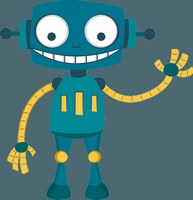

Rappelons qu'une  chaîne de caractères est un objet de type `str` composé de caractères et que chaque caractère d’une chaîne est repéré par son indice dans la chaîne, les indices commençant à `0`. De plus, le nombre total de caractères d’une chaîne est donnée par la fonction `len`.

Par exemple, si la variable `chaine` contient la chaîne de caractères `'abracadabra'`, alors :
 - `chaine[0]` et `chaine[3]` ont pour valeur le caractère `'a'` et `chaine[4]` a pour valeur le caractère `'c'` ;
 - `len(chaine)` renvoie la valeur `11`.

Considérons à présent deux chaînes de caractères, l’une appelée `texte` et l’autre appelée `motif`, et cherchons s’il existe une occurrence de `motif` dans `texte`. Il existe plusieurs algorithmes pour résoudre ce problème. Un des plus connus est l’algorithme de Knuth, Morris et Pratt, qui ne figure pas au programme de NSI. Un autre algorithme, très efficace, est l’algorithme de Boyer et Moore, inventé en 1977 à l’université d’Austin au Texas. C'est celui-ci que nous allons étudier dans cette activité.

Commençons tout d'abord par quelques rappels sur les chaînes de caractères.

<h2 class="alert alert-warning"><center>Rappels sur les chaînes de caractères</center></h2>

Le site <a href='http://www.gutenberg.org/browse/languages/fr'><span style='font-style:italic;'>Project Gutenberg</span></a>  propose les grands classiques de la littérature qui sont tombés dans le domaine public. On peut, par exemple, y trouver le texte intégral du roman <a href='http://www.gutenberg.org/ebooks/798.txt.utf-8'><strong>Le rouge et le noir</strong></a> de Stendhal dans l’encodage UTF-8, roman qui a été joint à ce notebook sous la forme du fichier `Le_rouge_et_le_noir.txt`.

1. Exécuter la cellule suivante. Que contient la variable `roman` ?

In [ ]:
with open('Le_rouge_et_le_noir.txt', 'r', encoding = 'utf-8') as fichier:
    roman = fichier.read()

<p style='color:gray; font-style:italic'>Ecrire la réponse ici</p>

2. Ecrire ci-dessous une instruction renvoyant la longueur du roman.

In [ ]:
# Ecrire l'instruction ici

3. Quelle est la longueur du motif `Julien trembla` ?

In [ ]:
# Ecrire l'instruction ici

4. Exécuter la cellule suivante.

In [ ]:
roman.find('Julien trembla')

 - Que représente la valeur renvoyée ?

<p style='color:gray; font-style:italic'>Ecrire la réponse ici</p>

 - Expliquer ce que renvoie l'instruction suivante. Est-ce normal ?

In [ ]:
roman[162167:162181]

<p style='color:gray; font-style:italic'>Ecrire la réponse ici</p>

5. Interpréter la valeur renvoyée par l'instruction suivante.

In [ ]:
roman.find('Joséphine')

<p style='color:gray; font-style:italic'>Ecrire la réponse ici</p>

6. La méthode `find` admet un second paramètre optionnel précisant la position de départ de la recherche. En utilisant celui-ci, il est possible de déterminer le nombre d'occurences d'un motif dans un texte.

Compléter la fonction `nb_occurrences` ci-dessous prenant en paramètre deux chaînes de caractères `texte` et `motif`, et renvoyant le nombre d'occurences de `motif` dans `texte`.

In [ ]:
def nb_occurences(texte, motif):
    cpt, indice_début_recherche = 0, 0
    while True:
        indice_début_motif = texte.find(motif, indice_début_recherche)
        if indice_début_motif == ...:
            return cpt
        else:
            cpt = ...
            indice_début_recherche = ...

Les cellules suivantes permettent de tester votre code. Elles doivent renvoyer `True` lors de leur exécution.

In [ ]:
nb_occurences(roman, 'Joséphine') == 0

In [ ]:
nb_occurences(roman, 'Julien trembla') == 1

In [ ]:
nb_occurences(roman, 'Mme de Rênal') == 369

<h2 class="alert alert-warning"><center>Algorithme de Boyer-Moore : version naïve</center></h2>

L’algorithme naïf de Boyer-Moore consiste simplement à comparer un à un, de gauche à droite, les caractères du texte apparaissant dans la fenêtre avec ceux du motif. En cas de non-correspondance, on avance simplement la fenêtre d’une unité vers la droite.

Par exemple, dans la situation suivante,

<img src='https://capytale2.ac-paris.fr/web/sites/default/files/2023/10-12/21-50-05/Boyer_Moore_naif_1.png' style='width:45%;height:auto;'>

on compare le `a` du motif avec le `r` du texte, obtenant immédiatement une différence. On peut donc avancer la fenêtre en incrémentant l'indice `i` qui passe de 14 à 15. Dans la nouvelle fenêtre, le premier caractère coïncide bien :

<img src='https://capytale2.ac-paris.fr/web/sites/default/files/2023/10-12/21-50-05/Boyer_Moore_naif_2.png' style='width:45%;height:auto;'>

et on incrémente l'indice `j` pour tester les caractères suivants, à savoir `d` et `c` :

<img src='https://capytale2.ac-paris.fr/web/sites/default/files/2023/10-12/21-50-05/Boyer_Moore_naif_3.png' style='width:45%;height:auto;'>

Comme on est à nouveau en situation d’échec, on décale les indices `i` et `j` comme suit :  `i = i + 1` et `j = 0`.

Pour une visualisation animée de cet algorithme naïf, cliquer <a href='https://diraison.github.io/BMH'>ici</a>, puis sur le titre afin de faire apparaître `Algorithme naïf` comme ci-dessous :

<img src='https://capytale2.ac-paris.fr/web/sites/default/files/2023/10-12/22-00-16/Boyer_Moore_naif_4.png' style='width:40%;height:auto;'>

<h2 class="alert alert-info">Exercice 1 : première approche</h2>

La fonction `cherche` ci-dessous prend en paramètre deux chaînes de caractères `texte` et `motif`, et renvoie la position de `motif` dans `texte` s'il est présent, `-1` sinon.

```python
def cherche(texte, motif):
    n = len(texte)
    p = len(motif)
    i = 0
    while i + p <= n:
        if correspondance(texte, motif, i): # on a trouvé une occurence de motif en position i dans texte
            return i
        else:
            i = i + 1
    return -1
```

1. Que renvoie chacune des instructions suivantes ?
  - `cherche('Bonjour ! Comment allez-vous ?', 'Comment')`
  - `cherche('Bonjour ! Comment allez-vous ?', 'comment')`

<p style='color:gray; font-style:italic'>Ecrire la réponse ici</p>

2. Compléter ci-dessous le code de la fonction `correspondance` afin qu'elle renvoie `True` s'il y a correspondance entre `motif` et `texte` à partir de l'indice `indice_départ`.

In [ ]:
def correspondance(texte, motif, indice_départ):
    for j in range(...):
        if texte[...] != motif[j]:
            return ...
    return ...


def cherche(texte, motif):
    i = 0
    while i + len(motif) <= len(texte):
        if correspondance(texte, motif, i): # on a trouvé une occurence de motif en position i dans texte
            return i
        else:
            i = i + 1
    return -1

Les deux cellules suivantes permettent de tester votre code. Elles doivent renvoyer `True` lors de leur exécution.
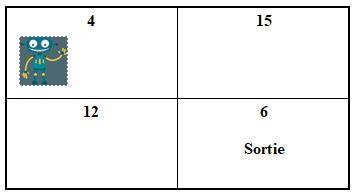

In [ ]:
cherche('Bonjour ! Comment allez-vous ?', 'Comment') == 10

In [ ]:
cherche('Bonjour ! Comment allez-vous ?', 'comment') == -1

<h2 class="alert alert-info">Exercice 2 : seconde approche</h2>

1. Regarder la <a href='https://www.youtube.com/watch?v=EeHwu5kI6II'>vidéo</a> jusqu'à 2 min 54, puis la partie programmation en JavaScript de 7 min 50 à 11 min 28.

2. Ecrire une fonction `boyer_moore_naif` prenant en paramètre deux chaînes de caractères `texte` et `motif`, et renvoyant la position de `motif` dans `texte` s'il est présent, `-1` sinon.

In [ ]:
def boyer_moore_naif(texte, motif):
    # code à compléter

Les deux cellules suivantes permettent de tester votre code. Elles doivent renvoyer `True` lors de leur exécution.
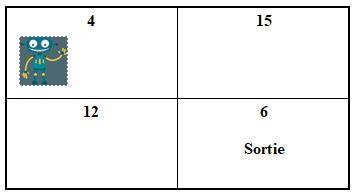

In [ ]:
boyer_moore_naif('Bonjour ! Comment allez-vous ?', 'Comment') == 10

In [ ]:
boyer_moore_naif('Bonjour ! Comment allez-vous ?', 'comment') == -1

**Complexité en temps dans le pire des cas :** on note `n` la longueur du texte et `p` la longueur du motif.

Le pire des cas est lorsqu'on est obligé de faire passer la fenêtre par tous les indices `i` de `0` à `n − p` et lorsque, pour chacun de ces indices `i`, on doit comparer tous les caractères du motif au texte. Par exemple, ceci arrive lorsque `texte = aaaaaaaaaaaaa` et `motif = aaaaaab`.

Dans ce cas, on vérifie qu'il y a `n − p + 1` appels à correspondance, chacun de ces appels nécessitant `p` comparaisons de caractères. Ainsi, la complexité dans le pire des cas est en `O(p(n − p))`.


<h2 class="alert alert-warning"><center>Algorithme de Boyer-Moore : version simplifiée de Horspool</center></h2>

Nigel Horspool est né en Grande-Bretagne mais citoyen canadien. Il est professeur émérite d’informatique de l’université de Victoria, retraité depuis 2016. Il a conçu l’algorithme que nous décrivons maintenant. 

Celui-ci est basé sur les deux idées suivantes :
 - la première consiste à comparer le motif avec la portion du texte qui apparaît dans la fenêtre de droite à gauche, et non pas de gauche à droite (on commence par la fin !) ; 
 - la seconde consiste à opérer un décalage de la fenêtre qui varie en fonction de la paire de caractères qui ont révélé la non-correspondance.

<h2 class="alert alert-info">Exercice 1 : un exemple &laquo; à la main &raquo;</h2>

Dans cet exercice, on souhaite recherche le motif `'dab'` dans le texte `'abracadabra`.

La longueur du texte est `n = 11`, la longueur du motif est `p = 3` et on souhaite vérifier que le motif apparaît dans le texte à la position `i = 6`.

1. On commence avec la fenêtre tout à gauche, c'est-à-dire avec `i = 0` :

<table>
    <tr>
        <td style='background-color:white;'><code style='background-color:white;'>i</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>0</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>1</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>2</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>3</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>4</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>5</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>6</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>7</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>8</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>9</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>10</code></td>
    </tr>
    <tr>
        <td style='background-color:white;'><code style='background-color:white;'>texte</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>a</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>b</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>r</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>a</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>c</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>a</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>d</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>a</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>b</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>r</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>a</code></td>
    </tr>
    <tr>
        <td style='background-color:white;'><code style='background-color:white;'>motif</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>d</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>a</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>b</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
    </tr>
    <tr>
        <td style='background-color:white;'><code style='background-color:white;'>j</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>0</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>1</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>2</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
    </tr>
    </table>
    
Comme on commence à comparer de droite à gauche, c’est pour `j = 2` qu’il y a non-correspondance : `motif[2] = 'b' != 'r' = texte[0+2]`

Pour quelle raison peut-on décaler directement le motif de trois unités vers la droite ?

<p style='color:gray; font-style:italic'>Ecrire la réponse ici</p>

2. On se retrouve à présent avec la fenêtre en `i = 3` :

<table>
    <tr>
        <td style='background-color:white;'><code style='background-color:white;'>i</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>0</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>1</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>2</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>3</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>4</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>5</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>6</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>7</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>8</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>9</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>10</code></td>
    </tr>
    <tr>
        <td style='background-color:white;'><code style='background-color:white;'>texte</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>a</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>b</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>r</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>a</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>c</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>a</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>d</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>a</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>b</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>r</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>a</code></td>
    </tr>
    <tr>
        <td style='background-color:white;'><code style='background-color:white;'>motif</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>d</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>a</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>b</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
    </tr>
    <tr>
        <td style='background-color:white;'><code style='background-color:white;'>j</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>0</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>1</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>2</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
    </tr>
    </table>
    
Comme on commence à comparer de droite à gauche, c’est à nouveau pour `j = 2` qu’il y a non-correspondance : `motif[2] = 'b' != 'a' = texte[3+2]`

A présent, on doit décaler le motif uniquement d'une unité vers la droite. Pour quelle raison ?

<p style='color:gray; font-style:italic'>Ecrire la réponse ici</p>

3. On se retrouve à présent avec la fenêtre en `i = 4` :

<table>
    <tr>
        <td style='background-color:white;'><code style='background-color:white;'>i</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>0</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>1</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>2</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>3</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>4</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>5</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>6</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>7</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>8</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>9</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>10</code></td>
    </tr>
    <tr>
        <td style='background-color:white;'><code style='background-color:white;'>texte</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>a</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>b</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>r</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>a</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>c</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>a</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>d</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>a</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>b</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>r</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>a</code></td>
    </tr>
    <tr>
        <td style='background-color:white;'><code style='background-color:white;'>motif</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>d</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>a</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>b</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
    </tr>
    <tr>
        <td style='background-color:white;'><code style='background-color:white;'>j</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>0</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>1</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>2</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
    </tr>
    </table>
    
Comme on commence à comparer de droite à gauche, c’est à nouveau pour `j = 2` qu’il y a non-correspondance : `motif[2] = 'b' != 'd' = texte[4+2]`

A présent, on doit décaler le motif de deux unités vers la droite. Pour quelle raison ?

<p style='color:gray; font-style:italic'>Ecrire la réponse ici</p>

On se retrouve à présent avec la fenêtre en `i = 6` :

<table>
    <tr>
        <td style='background-color:white;'><code style='background-color:white;'>i</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>0</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>1</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>2</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>3</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>4</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>5</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>6</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>7</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>8</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>9</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>10</code></td>
    </tr>
    <tr>
        <td style='background-color:white;'><code style='background-color:white;'>texte</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>a</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>b</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>r</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>a</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>c</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>a</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>d</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>a</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>b</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>r</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>a</code></td>
    </tr>
    <tr>
        <td style='background-color:white;'><code style='background-color:white;'>motif</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>d</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>a</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>b</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
    </tr>
    <tr>
        <td style='background-color:white;'><code style='background-color:white;'>j</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>0</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>1</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'>2</code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
        <td style='background-color:white;text-align:center;'><code style='background-color:white;'></code></td>
    </tr>
    </table>
    
et on trouve bien la première occurence du motif.

4. Tester la recherche précédente avec la visualisation animée que l'on trouvera <a href='https://diraison.github.io/BMH'>ici</a>. Cliquer sur le titre afin de faire apparaître `Algorithme de Boyer-Moore (bad char)` comme ci-dessous :

<img src='https://capytale2.ac-paris.fr/web/sites/default/files/2023/10-13/15-37-25/Boyer_Moore_Horspool.png' style='width:40%;height:auto;'>

<h2 class="alert alert-info">Exercice 2 : implémentation</h2>

1. Regarder la <a href='https://www.youtube.com/watch?v=EeHwu5kI6II'>vidéo</a> de 2 min 55 à 7 min 30, puis compléter la fonction `table_décalage` ci-dessous prenant en paramètre une chaîne de caractères et renvoyant, sous forme de dictionnaire, la table des décalages.

In [ ]:
def table_décalage(chaine):
    decalage = {}
    for i in range():
        decalage[...] = ...
    return decalage

Les cellules suivantes permettent de tester votre code. Elles doivent renvoyer `True` lors de leur exécution.

In [ ]:
table_décalage('bonjour') == {'b': 6, 'o': 2, 'n': 4, 'j': 3, 'u': 1}

In [ ]:
table_décalage('dab') == {'d': 2, 'a': 1}

In [ ]:
table_décalage('dabab') == {'d': 4, 'a': 1, 'b': 2}

In [ ]:
table_décalage('ACTGACTGACTG') == {'A': 3, 'C': 2, 'T': 1, 'G': 4}

2. Regarder la <a href='https://www.youtube.com/watch?v=EeHwu5kI6II'>vidéo</a> de 11 min 30 à 17 min 05.

3. On donne la fonction suivante :

In [ ]:
def boyer_moore(texte, motif):
    table = table_décalage(motif)
    i = 0
    while len(texte) - i >= len(motif):
        j = len(motif)-1
        while texte[i+j] == motif[j]:
            if j == 0:
                return i
            j = j - 1
        if texte[i+len(motif)-1] in table:
            deplacement = table[texte[i+len(motif)-1]]
        else:
            deplacement = len(motif)
        i = i + deplacement
    return -1

ainsi que les deux cellules de tests suivantes :
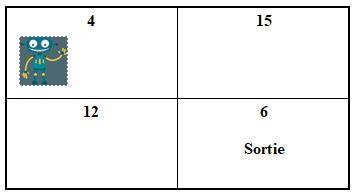

In [ ]:
boyer_moore('Bonjour ! Comment allez-vous ?', 'Comment') == 10

In [ ]:
boyer_moore('Bonjour ! Comment allez-vous ?', 'comment') == -1

 - Expliquer les lignes 5 à 9

<p style='color:gray; font-style:italic'>Ecrire la réponse ici</p>

 - Expliquer les lignes 10 à 14

<p style='color:gray; font-style:italic'>Ecrire la réponse ici</p>

 - Expliquer la ligne 4

<p style='color:gray; font-style:italic'>Ecrire la réponse ici</p>

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />Ce document  est mis à disposition selon les termes de la <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Licence Creative Commons Attribution -  Partage dans les Mêmes Conditions 4.0 International</a>.
Pour toute question : <a href="mailto:charles.poulmaire@ac-versailles.fr">charles.poulmaire@ac-versailles.fr</a> ou <a href="mailto:pascal.remy@ac-versailles.fr">pascal.remy@ac-versailles.fr</a>